In [1]:

from sklearn.metrics import make_scorer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib.image import imread
import pandas as pd
import seaborn as sns
from sklearn.datasets import (make_blobs,
                                                make_circles,
                                                make_moons)
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score


In [33]:
#Считаем, что TP это найденные опасные запросы
def metric1(y_true, y_pred):
  TP = 0
  TN = 0
  FP = 0
  FN = 0
  Num_1=0
  Num_2=0
  for i in range(len(y_pred)):
    if y_pred[i] == 0:
      Num_1 += 1
    if y_pred[i] == 1:
      Num_2 += 1
  #Если кластер 0 - опасный трафик    
  if(Num_1 < Num_2):
    for i in range(len(y_true)):
      if y_true[i] == 1 and y_pred[i] == 0:
        TP += 1
      if y_true[i] == 0 and y_pred[i] == 0:
        FP += 1
      if y_true[i] == 0 and y_pred[i] == 1:
        TN += 1
      if y_true[i] == 1 and y_pred[i] == 1: 
        FN += 1
  else:
    for i in range(len(y_true)):
      if y_true[i] == 1 and y_pred[i] == 1:
        TP += 1
      if y_true[i] == 0 and y_pred[i] == 1:
        FP += 1
      if y_true[i] == 0 and y_pred[i] == 0:
        TN += 1
      if y_true[i] == 1 and y_pred[i] == 0: 
        FN += 1
  Acc = (TP + TN) / (TP + TN + FP + FN)
  Prec = TP / (TP + FP)
  Rec = TP / (TP + FN)
  f_1 = 2*Prec*Rec / (Prec + Rec)
  d = {'TP': TP, 'TN': TN, 'FP': FP, 'FN': FN, 'Acc' : Acc, 'Prec': Prec, 'Rec' : Rec, 'f1' : f_1}
  return d

In [2]:
###Модуль с кластеризацией ####
import pandas as pd
# Загрузка составленного датасета из файла

data_clast = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Diplom Work/data/DF_res.csv', delimiter=',')
#data_clast

data_clast = data_clast.drop(columns = ['Unnamed: 0'], axis = 1)
data_clast.rename(columns = {'Label':'Cluster'}, inplace = True)
data_clast 

,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,...,v_759,v_760,v_761,v_762,v_763,v_764,v_765,v_766,v_767,Cluster
0,0.494427,0.061998,0.691902,-0.471939,0.559799,-0.180901,0.341351,0.231110,0.033267,-0.178274,...,-0.090135,-0.423126,0.041139,-0.272625,-0.250488,-0.096983,-0.243879,-0.297217,-0.022840,1
1,-0.419222,-0.153809,0.835694,-0.593651,0.369079,-0.274523,0.204267,0.434409,0.383093,0.130761,...,-0.007678,-0.454896,-0.002399,0.150841,0.230170,-0.051501,-0.664750,-0.159693,0.694422,1
2,0.183771,-0.236388,0.646532,-0.620028,-0.013147,-0.265390,0.044263,0.350538,0.172885,-0.019581,...,-0.213705,-0.199302,-0.223143,0.077056,0.216391,-0.190699,-0.793233,-0.098753,0.658823,1
3,0.027312,-0.305726,0.617269,-0.630630,0.231568,-0.526451,-0.102434,0.183224,0.220388,0.069656,...,-0.033646,-0.431504,-0.054837,0.215584,0.231383,-0.065605,-0.628338,-0.301148,0.875142,1
4,-0.220235,-0.180620,0.607961,-0.397392,0.324019,-0.268316,-0.138487,0.396324,0.216409,-0.024682,...,-0.049187,-0.343633,-0.062400,0.255368,0.284027,-0.172170,-0.807413,-0.105306,0.828324,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30604,-0.029293,-0.248417,0.283540,-0.612247,0.434795,0.205745,0.611813,0.504208,-0.231640,-0.038432,...,-0.264770,-0.027695,-0.062228,0.719947,0.258421,-0.257912,-0.537979,-0.260901,0.183249,0
30605,0.210175,-0.703460,0.241675,-0.096402,-0.103304,-0.329889,-0.011471,0.497379,0.261013,-0.398343,...,-0.252915,-0.165918,-0.497170,0.880667,-0.120650,-0.411049,-0.645428,-0.387892,-0.069771,0
30606,-0.379825,-0.527772,0.049862,-0.068713,0.372309,0.099324,-0.363554,-0.139586,0.005208,-0.258269,...,-0.023981,0.324553,0.271811,0.123789,0.068317,-0.300963,-0.066151,-0.618220,0.541520,0
30607,0.121569,-0.505593,0.622385,-0.735325,0.030311,0.364395,0.401868,-0.374090,0.173841,-0.702152,...,-0.233276,-0.417092,0.385117,-0.034582,0.375437,-0.554751,-0.547430,-0.585807,0.203560,0


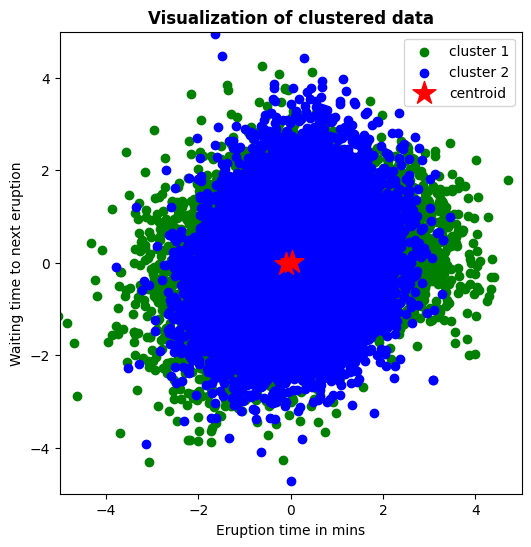

In [4]:
from sklearn.cluster import KMeans, SpectralClustering

X = data_clast.drop(['Cluster'], axis = 1)
y = data_clast['Cluster']

# Standardize the data
X_std = StandardScaler().fit_transform(X)

# Run local implementation of kmeans
km = KMeans(n_clusters=2, max_iter=300, n_init = 10, algorithm ='lloyd', init = 'k-means++')
km.fit(X_std)
centroids = km.cluster_centers_

# Plot the clustered data
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(X_std[km.labels_ == 0, 0], X_std[km.labels_ == 0, 1],
            c='green', label='cluster 1')
plt.scatter(X_std[km.labels_ == 1, 0], X_std[km.labels_ == 1, 1],
            c='blue', label='cluster 2')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='r', label='centroid')
plt.legend()
plt.xlim([-5, 5])
plt.ylim([-5, 5])
plt.xlabel('Eruption time in mins')
plt.ylabel('Waiting time to next eruption')
plt.title('Visualization of clustered data', fontweight='bold')
ax.set_aspect('equal');

In [34]:
#Результаты K-means
d_params = metric1(y, km.labels_)
d_params

{'TP': 390,
 'TN': 11003,
 'FP': 8265,
 'FN': 10951,
 'Acc': 0.3722107876768271,
 'Prec': 0.045060658578856154,
 'Rec': 0.034388501895776385,
 'f1': 0.03900780156031206}

   1st principal component  2nd principal component
0                -0.004348                -0.007003
1                 0.613941                -0.328919
2                 0.401684                -0.281640
30609


Text(0.5, 1.0, 'Result of k-means + PCA')

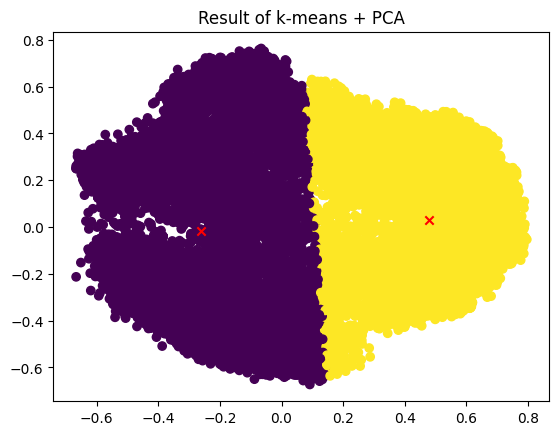

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

#PCA - метод главных компонент для понижения размерности пространства
X = data_clast.drop(['Cluster'], axis = 1)
y = data_clast['Cluster']

scaler = StandardScaler()
d_scaled = scaler.fit_transform(X) 
d_normalized = normalize(d_scaled) 
d_normalized = pd.DataFrame(d_normalized)
pca = PCA(n_components = 2)
d_principal = pca.fit_transform(d_normalized) 
d_principal = pd.DataFrame(d_principal)
d_principal.columns = ['1st principal component','2nd principal component']
print(d_principal.head(3)) 
print(len(d_principal))

kmeans = KMeans(n_clusters=2, max_iter=300, n_init = 10, algorithm ='lloyd', init = 'k-means++') 
kmeans.fit(d_principal)
data_cl = kmeans.labels_
kmeans.labels_

plt.scatter(d_principal['1st principal component'], d_principal['2nd principal component'], c=data_cl, label='0')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1] ,marker="x", color="red")
plt.title('Result of k-means + PCA')

In [35]:
#Результаты K-means с приведением к двумерному пространству
d_params = metric1(y, data_cl)
d_params

{'TP': 9935,
 'TN': 18417,
 'FP': 851,
 'FN': 1406,
 'Acc': 0.9262635172661635,
 'Prec': 0.9211014277767476,
 'Rec': 0.8760250418834318,
 'f1': 0.8979979210918787}

In [29]:
#Находим сильно удаленные точки и находим пересечение их для двух кластеров

from sklearn.cluster import KMeans
from numpy import sqrt, random, array, argsort
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
center = kmeans.cluster_centers_

distance1 = pd.DataFrame(sqrt(((d_principal - center[:,0])**2).sum(axis=1)))
distance2 = pd.DataFrame(sqrt(((d_principal - center[:,1])**2).sum(axis=1)))

order_index = argsort(distance1, axis = 0)
indexes = order_index[-20:]
indexes = list(indexes[0])

order_index2 = argsort(distance2, axis = 0)
indexes2 = order_index2[-20:]
indexes2 = list(indexes2[0])

c = []
for i in indexes:
  for j in indexes2:
    if i == j:
      c.append(i)
      break
print(c)

values = d_principal.loc[c]

[8041, 7774, 2677]


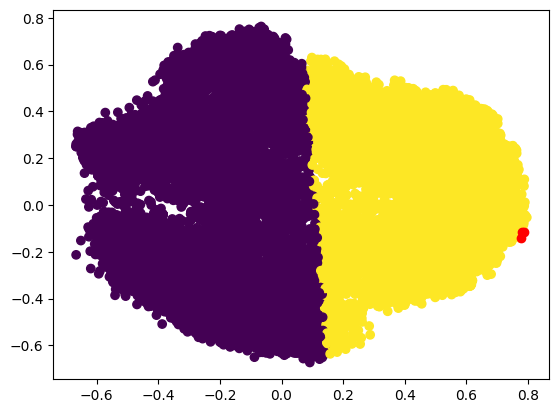

In [30]:
#Рисуем выбросы

plt.scatter(d_principal['1st principal component'], d_principal['2nd principal component'], c=data_cl, label='0')
plt.scatter(values['1st principal component'], values['2nd principal component'], color='r')
plt.show()

Text(0.5, 1.0, 'Result of k-means + Feature Agglomeration')

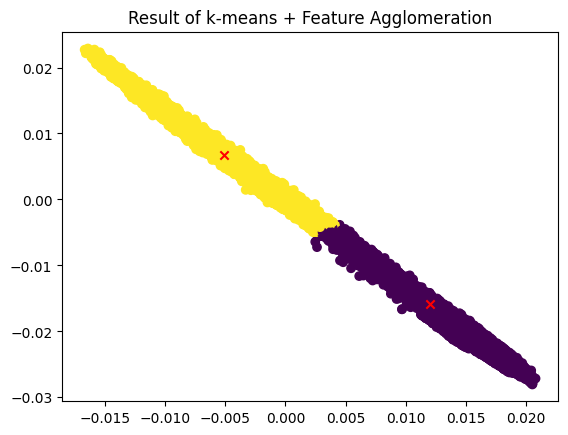

In [31]:
# c уменьшением размерности данных методом Feature Agglomeration
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.cluster import FeatureAgglomeration
#FeatureAgglomeration

scaler = StandardScaler()
d_scaled = scaler.fit_transform(X) 
d_normalized = normalize(d_scaled) 
d_normalized = pd.DataFrame(d_normalized)

fa = FeatureAgglomeration(2)
d_principal = fa.fit_transform(d_normalized) 
d_principal = pd.DataFrame(d_principal) 
d_principal.columns = ['P1', 'P2'] 

kmeans1 = KMeans(n_clusters=2, max_iter=300, n_init = 10, algorithm ='lloyd', init = 'k-means++') 
kmeans1.fit(d_principal)
data_cl1 = kmeans1.labels_
kmeans1.labels_

plt.scatter(d_principal['P1'], d_principal['P2'], c=data_cl1, label='0')
plt.scatter(kmeans1.cluster_centers_[:, 0], kmeans1.cluster_centers_[:, 1] ,marker="x", color="red")
plt.title('Result of k-means + Feature Agglomeration') 


In [36]:
#Результаты K-means с FeatureAgglomeration 
d_params = metric1(y, data_cl1)
d_params

{'TP': 9081,
 'TN': 17083,
 'FP': 2185,
 'FN': 2260,
 'Acc': 0.8547812734816557,
 'Prec': 0.8060536126398011,
 'Rec': 0.8007230402962702,
 'f1': 0.803379484230548}